# Predictions on training data

Predictions on training data can be obtained either by using the `backtesting_forecaster()` function or by accessing the `predict()` method of the regressor stored inside the forecaster object.

# Libraries

In [2]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from sklearn.ensemble import RandomForestRegressor

# Data

In [3]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
print(data.head(4).to_markdown())

| datetime            |        y |
|:--------------------|---------:|
| 1991-07-01 00:00:00 | 0.429795 |
| 1991-08-01 00:00:00 | 0.400906 |
| 1991-09-01 00:00:00 | 0.432159 |
| 1991-10-01 00:00:00 | 0.492543 |


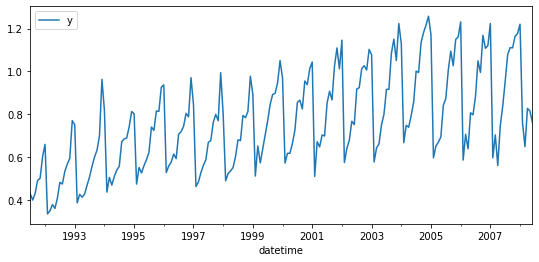

In [4]:
# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax)
ax.legend();

# Backtesting forecaster on training data

First, the forecaster is trained.

In [5]:
# Fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15 
             )

forecaster.fit(y=data['y'])

It is possible to perform backtesting using an already trained forecaster without modifying it if arguments `initial_train_size = None` and `refit = False`. 

In [6]:
# Backtest train data
# ==============================================================================
metric, predictions_train = backtesting_forecaster(
                                forecaster = forecaster,
                                y          = data['y'],
                                initial_train_size = None,
                                steps      = 1,
                                metric     = 'mean_squared_error',
                                refit      = False,
                                verbose    = False
                           )

print(f"Backtest training error: {metric}")

print(predictions_train.head(4).to_markdown())

Backtest training error: [0.00053925]
|                     |     pred |
|:--------------------|---------:|
| 1992-10-01 00:00:00 | 0.553611 |
| 1992-11-01 00:00:00 | 0.568324 |
| 1992-12-01 00:00:00 | 0.735167 |
| 1993-01-01 00:00:00 | 0.723217 |


The first 15 observations are not predicted since they are needed to create the lags used as predictors.

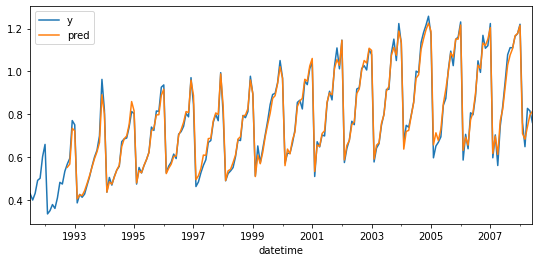

In [7]:
# Plot training predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data.plot(ax=ax)
predictions_train.plot(ax=ax)
ax.legend();

# Predict using the internal regressor

In [8]:
# Fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15 
             )

forecaster.fit(y=data['y'])

In [9]:
# Create training matrix
# ==============================================================================
X, y = forecaster.create_train_X_y(
            y = data['y'], 
            exog = None
       )

Using the internal regressor only allows predicting one step.

In [10]:
# Predict using the internal regressor
# ==============================================================================
forecaster.regressor.predict(X)[:4]

array([0.55361079, 0.56832448, 0.73516725, 0.72321715])